## Observations and Insights 

'''
Out of all drugs in the study Capomulin was tested on the greatest number of mice (230), followed by Remicane which was tested on 228 mice. 

There was an almost equal ratio of female to male mice in the study (49.8% female to 50.2 % male).

On Mouse x401 tumor volume had shrunk significantly over the course of treatment starting at 45.0 mm3 and reducing down to 28.5mm3 over the course of 45 days.

There is a positive correlation between average tumor volume and the weight of the mouse.
'''

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID') 
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
unique_mice = combined_data_df["Mouse ID"].nunique()
unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID_number = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),['Mouse ID', 'Timepoint']]
duplicate_mice_ID_number.index


Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data_df.loc[combined_data_df["Mouse ID"] == "g989",:]
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_dataframe = combined_data_df[combined_data_df.index.isin(list(duplicate_mice_ID_number.index))==False]
clean_mouse_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_mice1 = clean_mouse_dataframe["Mouse ID"].nunique()
unique_mice1

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats = pd.DataFrame(clean_mouse_dataframe.groupby("Drug Regimen").count())
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = clean_mouse_dataframe.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
tumor_median = clean_mouse_dataframe.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
tumor_variance = clean_mouse_dataframe.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
tumor_std = clean_mouse_dataframe.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
tumor_sem = clean_mouse_dataframe.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_table =pd.DataFrame({
                          'Mean':tumor_mean,
                          'Median':tumor_median,
                          'Variance':tumor_variance,
                          'Standard Deviation':tumor_std,
                          'SEM': tumor_sem
                           })

summary_table.round(2)



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table2 = clean_mouse_dataframe.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summary_table2 = summary_table2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summary_table2.round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

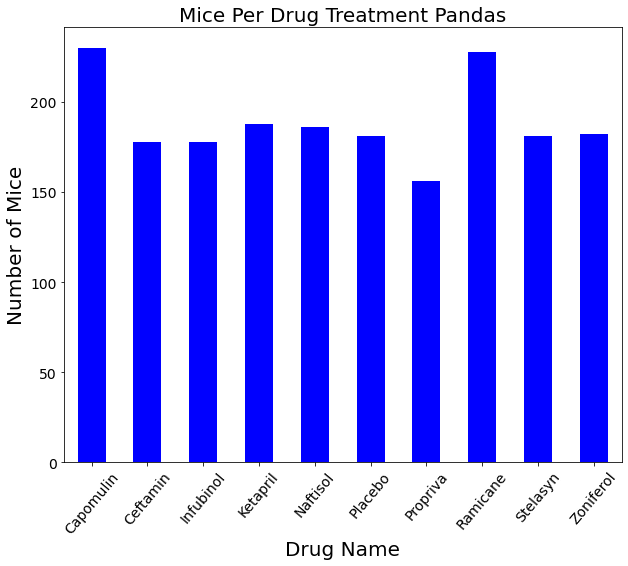

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_mouse_dataframe.groupby(["Drug Regimen"]).count()["Mouse ID"]
plot_pandas = bar_plot.plot.bar(figsize = (10,8),color = 'b', fontsize = 14,rot=50)
bar_plot
plt.xlabel("Drug Name",fontsize = 20)
plt.ylabel("Number of Mice",fontsize = 20)
plt.title("Mice Per Drug Treatment Pandas",fontsize = 20)
plt.savefig("../Images/Mice_Per_Drug_Treatment_Bar_Plot.png", bbox_inches = "tight")
plt.show()

In [11]:

mice_list =(clean_mouse_dataframe.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list


[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

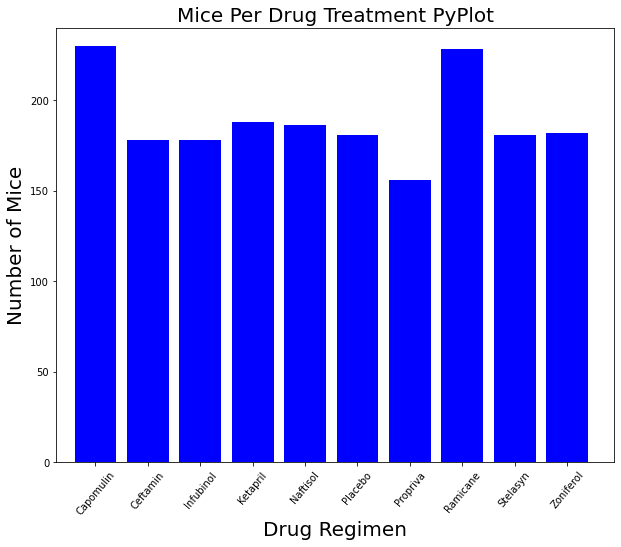

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(bar_plot ))
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.bar(x_axis, mice_list, color='b', alpha=1, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=50)
plt.xlim(-.75, len(x_axis)-0.10)
plt.ylim(0, max(mice_list)+10)
plt.title("Mice Per Drug Treatment PyPlot",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 20)
plt.ylabel("Number of Mice",fontsize = 20)
plt.savefig("../Images/Mice_Per_Drug_Treatment_Bar_PyPlot.png", bbox_inches = "tight")
plt.show()

In [13]:
#Gets the gender of the mice in the study
mice_gender = combined_data_df.groupby(["Mouse ID","Sex"])
mice_gender


In [14]:
mice_gender_df = pd.DataFrame(mice_gender.size())
mice_gender_df

,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [19]:
#Extracts male and female labels for the graph
mice_gender_df = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mice_gender_df.columns = ["Total Count"]
mice_gender_df

,Total Count
Sex,
Female,124
Male,125


In [20]:
#Extracts only the sex values for male and female mice
mice_gender_df["Percentage of Sex"] = (100*(mice_gender_df["Total Count"]/mice_gender_df["Total Count"].sum()))
mice_gender_df

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


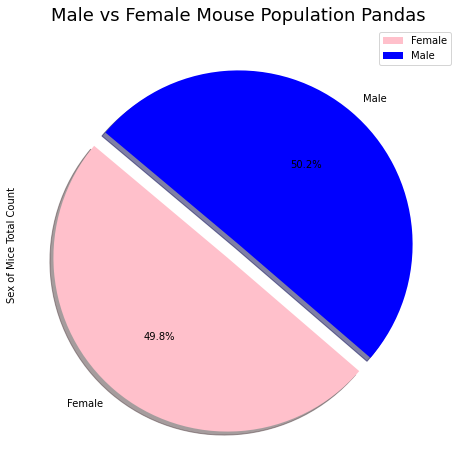

There was an almost equal ratio of female to male mice in the study


In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mice_gender_df.plot.pie(y='Total Count',figsize=(10,8), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population Pandas',fontsize = 18)
plt.ylabel('Sex of Mice Total Count',fontsize = 10)


plt.savefig("../Images/Pie_Chart_Pandas.png", bbox_inches = "tight")
plt.show()


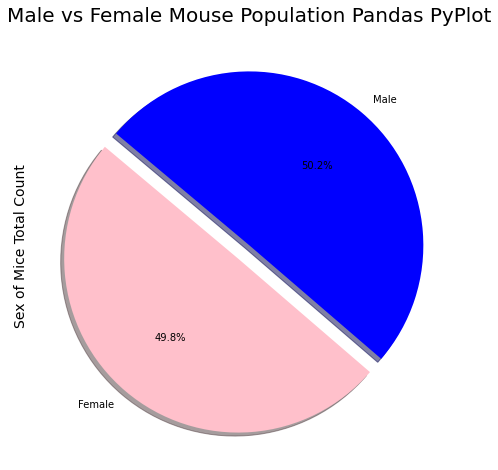

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)
fig_size = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)

plt.title('Male vs Female Mouse Population Pandas PyPlot',fontsize = 20)
plt.ylabel('Sex of Mice Total Count',fontsize = 14)
plt.savefig("../Images/Pie_Chart_PyPlot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

drug_data = combined_data_df[combined_data_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
drug_data = drug_data.sort_values(["Timepoint"], ascending=True)
drug_data = drug_data[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
drug_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [27]:
#Combine the  data by Drug Regimen and Mouse ID to extract the measurement of the last tumor
drug_data_sort = drug_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
drug_data_sort

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [30]:
# Convert the retrieved data into a df
best_drug_data_df = drug_data_sort.to_frame()
best_drug_data_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

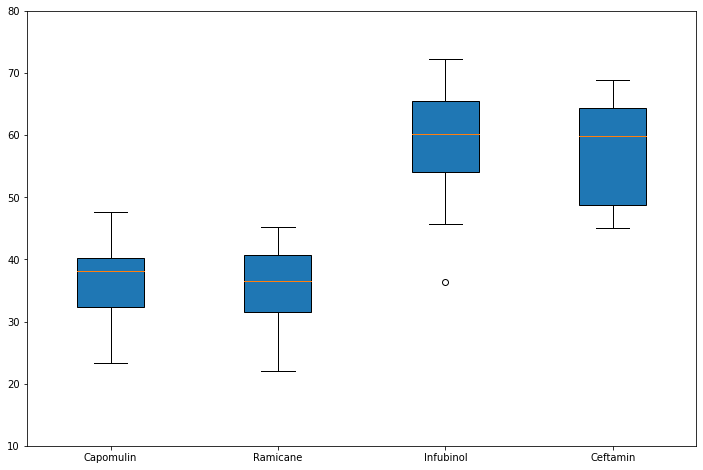

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
qnt_plot_df = best_drug_data_df.reset_index()

tumor_lists = qnt_plot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

tumor_list_df = pd.DataFrame(tumor_lists)

tumor_list_df = tumor_list_df.reindex(drug_list)

tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]


#Visual 
fig1, ax1 = plt.subplots(figsize=(12, 8))

plt.boxplot(tumor_vols, labels=drug_list,widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

#Display and save to folder
plt.savefig("../Images/Mouse_Tumor_Box_Plot.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

In [47]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin",:]
capomulin_data_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401",:]
capomulin_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


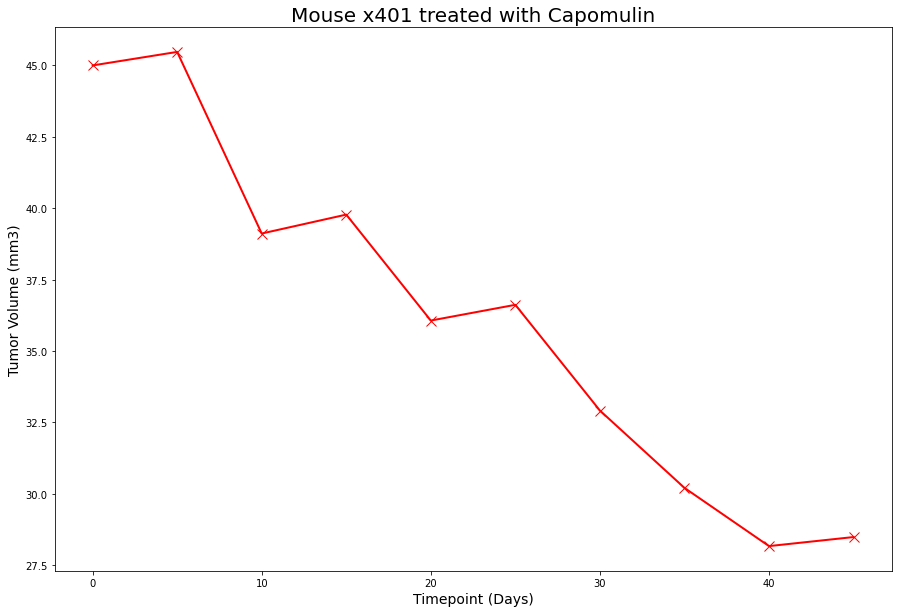

Tumor volume had shrunk significantly over the course of treatment starting at 45.0 mm3 and reducing down to 28.5mm3 over the course of 45 days


In [100]:
x_axis = capomulin_data_df["Timepoint"]
tumor_size = capomulin_data_df["Tumor Volume (mm3)"]

ax1 = plt.subplots(figsize=(15, 10))
plt.title('Mouse x401 treated with Capomulin',fontsize =20)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=10,marker="x",color="red")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/Mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()


In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Average tumor value per mouse
avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_tumor_vol_df

,Mouse ID,avg_tumor_vol
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344
5,i557,44.805810
6,i738,39.141053
7,j119,44.465236
8,j246,43.216925
9,l509,44.434474


In [94]:
#Combine average tumor volume with 
avg_tumor_vol_df = pd.merge(capomulin_df, avg_tumor_vol_df, on='Mouse ID')
tv_vs_mv_scatter = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
tv_vs_mv_scatter

,Weight (g),avg_tumor_vol
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


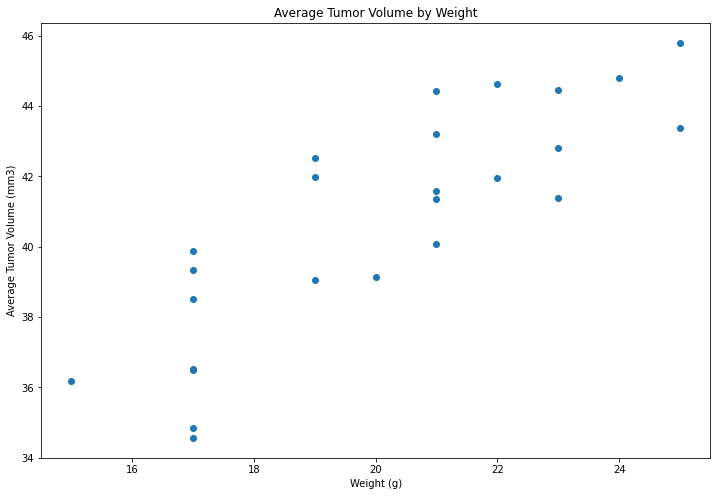

In [96]:
ax2 = plt.subplots(figsize=(12, 8))
x_data = tv_vs_mv_scatter ['Weight (g)']
y_data = tv_vs_mv_scatter ['avg_tumor_vol']
plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.savefig("../Images/Mouse_Capomulin_scatter_plot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


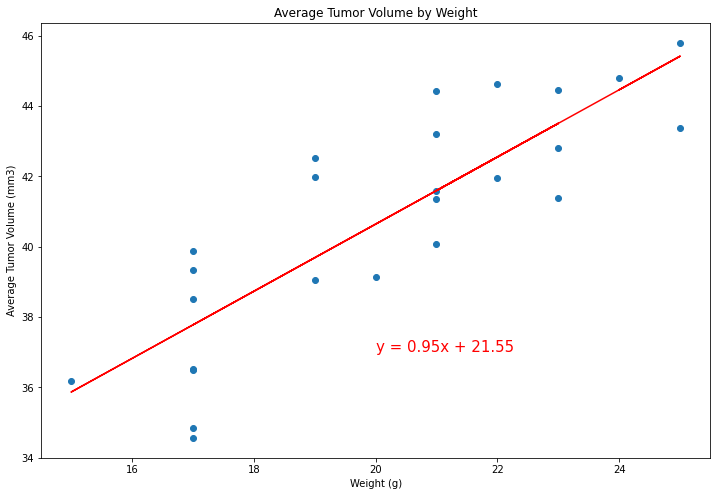

There is a positive correlation between average tumor volume and the weight of the mouse


In [99]:
ax3 = plt.subplots(figsize=(12, 8))
x_data = tv_vs_mv_scatter ['Weight (g)']
y_data = tv_vs_mv_scatter ['avg_tumor_vol']
#calculate correlation coefficient 
correlation_coef = st.pearsonr(x_data, y_data)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter and linear regression
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.savefig("../Images/Mouse_Capomulin_linear_reg.png", bbox_inches = "tight")
plt.show()
